In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

pinguins = pd.read_csv('../palmerpenguins_extended.csv')

pinguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021
...,...,...,...,...,...,...,...,...,...,...,...
3425,Gentoo,Biscoe,44.0,20.4,252.0,6447.0,male,squid,adult,healthy,2025
3426,Gentoo,Biscoe,54.5,25.2,245.0,6872.0,male,squid,adult,healthy,2025
3427,Gentoo,Biscoe,51.4,20.4,258.0,7409.0,male,squid,adult,overweight,2025
3428,Gentoo,Biscoe,55.9,20.5,247.0,6491.0,male,squid,adult,healthy,2025


In [3]:
pinguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
diet                 0
life_stage           0
health_metrics       0
year                 0
dtype: int64

### Como eu trataria valores ausentes ou inconsistentes no dataset?
Podemos remover os valores ausentes caso eles afetem a analise para um calculo ou valores quebrados ou duplicados. Ou preencher quando mesmo vazio, o dado tem significado, tipo um exemplo de exerciicos anteriores que eu vi sobre medida de sangue, tinha uma coluna se a pessoa tinha feito tal exame, se estiver vazio tem significado, podemos preencher com "Nao realizado" em vez de deixar vazio ou quando é informações calculaveis podemos preencher com um calculo para cada um. E sobre os dados inconsistentes podemos lidar com eles com muita identificação e observação primeiramente, para ir tratando e padronificando cada um deles e até removendo os que estão fora do nosso dominio esperado.

In [4]:
spacies = pinguins.groupby('species').agg({
    'bill_length_mm': ['mean', 'median', 'std'],
    'bill_depth_mm': ['mean', 'median', 'std'],
    'flipper_length_mm': ['mean', 'median', 'std'],
    'body_mass_g': ['mean', 'median', 'std']
})

spacies

bill_length_mm                   bill_depth_mm                   \
                    mean median        std          mean median       std   
species                                                                     
Adelie         35.431603   32.3  11.563505     17.464487   17.4  2.600754   
Chinstrap      35.014607   31.8  10.846660     18.421188   18.3  2.514383   
Gentoo         44.161909   40.7  14.203180     19.689415   19.6  2.609721   

          flipper_length_mm                    body_mass_g          \
                       mean median        std         mean  median   
species                                                              
Adelie           200.759615  196.0  27.236390  4445.475641  4343.5   
Chinstrap        201.675762  199.0  24.693963  4602.531300  4439.0   
Gentoo           217.546111  214.0  29.980265  5437.640738  5234.0   

                        
                   std  
species                 
Adelie     1063.539766  
Chinstrap  1109.656848  
Gentoo     1456.089810

### A espécie mais pesada
Gentoo com peso médio de 5437.6 g.

### A maior espécie (asa mais longa)
Gentoo com comprimento médio da asa de 217.5 mm.
### A espécie com o bico mais longo
Gentoo com comprimento médio do bico de 44.1 mm.

### Observação sobre a Adelie
por ser a menor espécie, ela tem o desvio padrão ou seja, a relação com as outras partes, sempre menor.

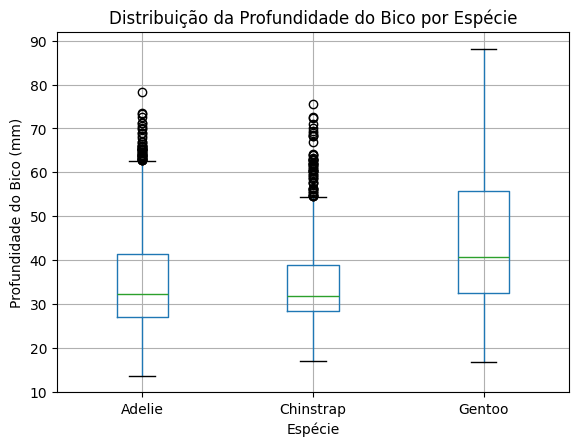

In [5]:
pinguins.boxplot(column="bill_length_mm", by="species")
plt.title("Distribuição da Profundidade do Bico por Espécie")
plt.suptitle("") 
plt.xlabel("Espécie") 
plt.ylabel("Profundidade do Bico (mm)")
plt.show()

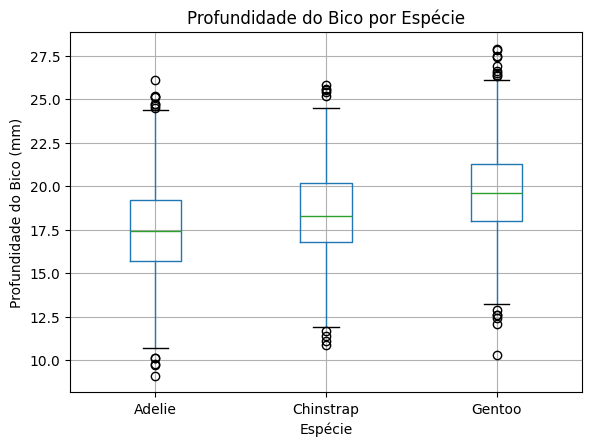

In [6]:
pinguins.boxplot(column='bill_depth_mm', by='species')
plt.title('Profundidade do Bico por Espécie')
plt.suptitle('')
plt.ylabel('Profundidade do Bico (mm)')
plt.xlabel("Espécie") 

plt.show()

Text(0.5, 0, 'Espécie')

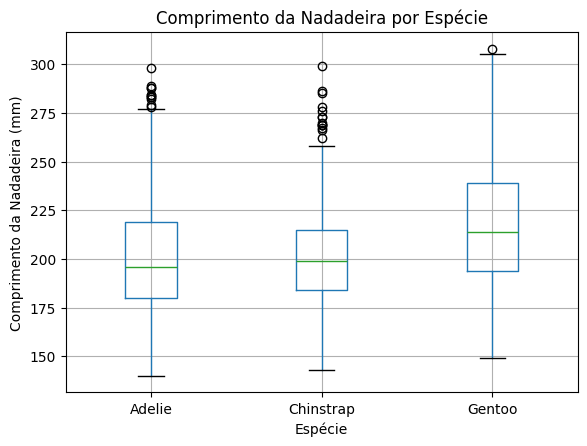

In [7]:
# Gráfico de Flipper Length
pinguins.boxplot(column='flipper_length_mm', by='species')
plt.title('Comprimento da Nadadeira por Espécie')
plt.suptitle('')
plt.ylabel('Comprimento da Nadadeira (mm)')
plt.xlabel("Espécie") 


Text(0.5, 0, 'Espécie')

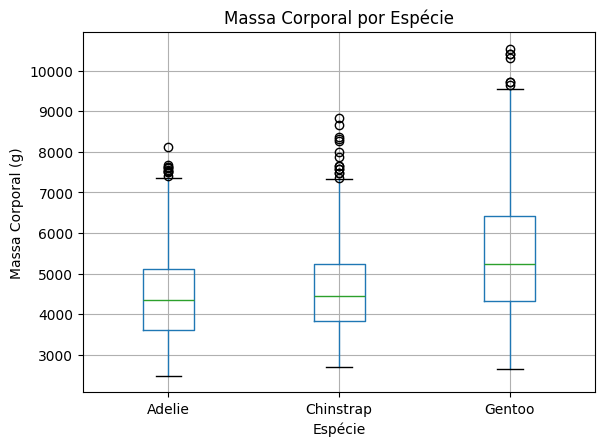

In [8]:
# Gráfico de Body Mass
pinguins.boxplot(column='body_mass_g', by='species')
plt.title('Massa Corporal por Espécie')
plt.suptitle('')
plt.ylabel('Massa Corporal (g)')
plt.xlabel("Espécie") 


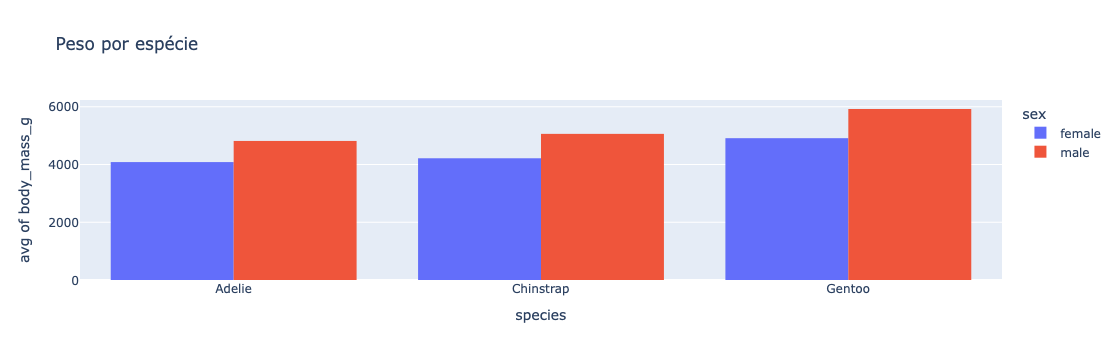

In [19]:
px.histogram(
    pinguins, 
    x="species",
    y="body_mass_g",
    color="sex",
    barmode="group",
    histfunc="avg",
    title="Peso por espécie"
)

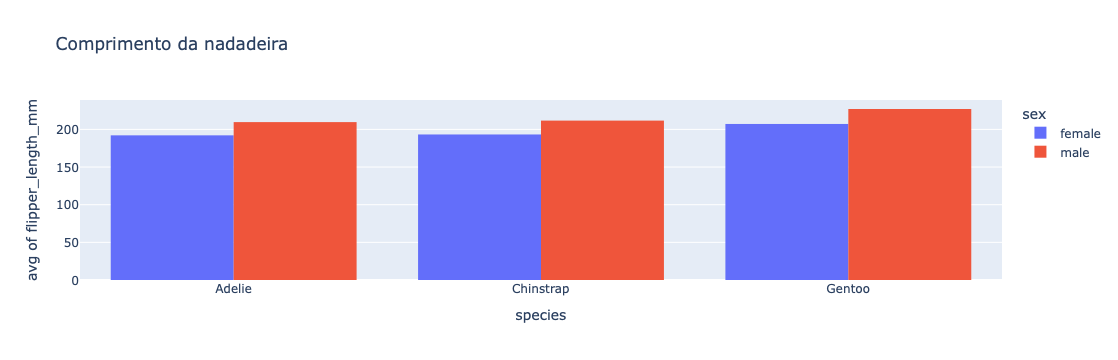

In [20]:
px.histogram(
    pinguins, 
    x="species",
    y="flipper_length_mm",
    histfunc="avg",
    color="sex",
    barmode="group",
    title="Comprimento da nadadeira"
)

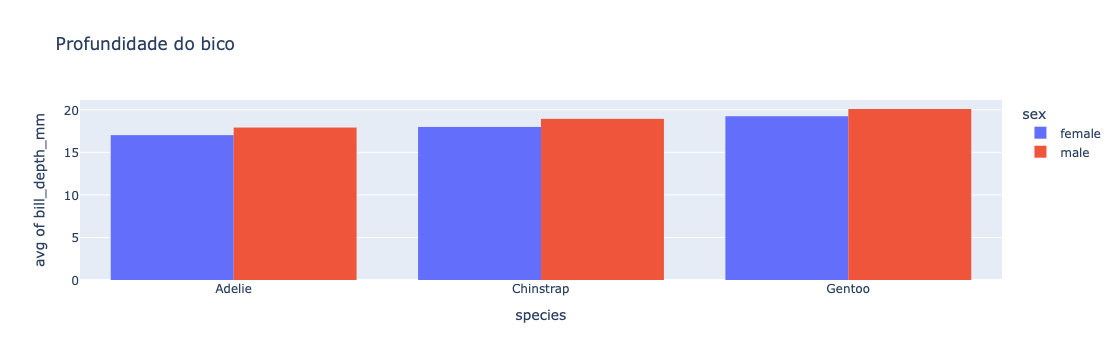

In [21]:
px.histogram(
    pinguins, 
    x="species",
    y="bill_depth_mm",
    color="sex",
    barmode="group",
    histfunc="avg",
    title="Profundidade do bico"
)

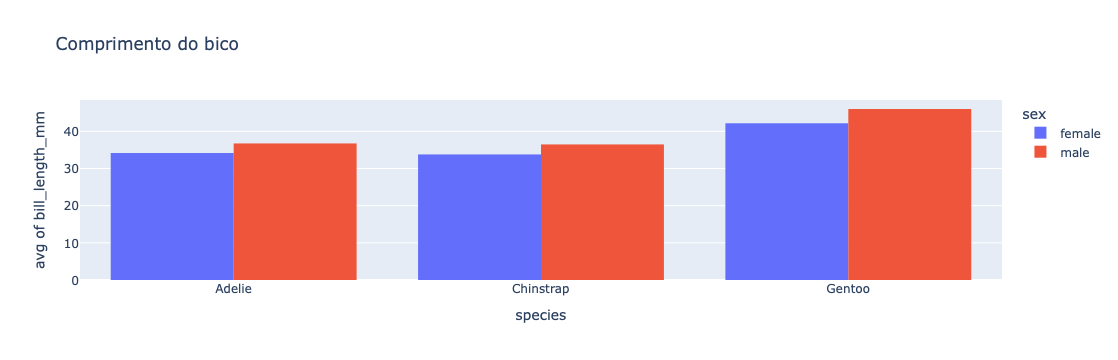

In [22]:
px.histogram(
    pinguins, 
    x="species",
    y="bill_length_mm",
    color="sex",
    barmode="group",
    histfunc="avg",
    title="Comprimento do bico"
)

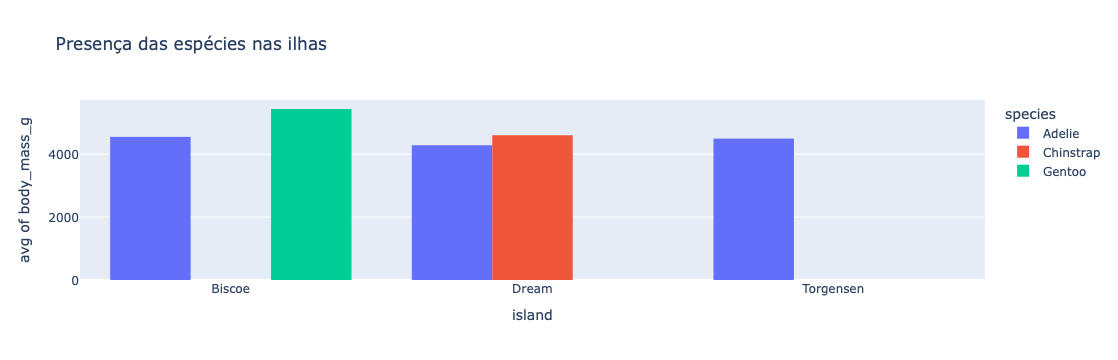

In [25]:
px.histogram(
    pinguins, 
    x="island",
    y="body_mass_g",
    color="species",
    barmode="group",
    histfunc="avg",
    title="Presença das espécies nas ilhas"
)

### Observações
Podemos ver a presença das espécies de em cada ilha, onde podemos ver que não temos as espécies Chinstrap e Gentoo na ilha de Torgensen. E podemos ver o peso de cada espécie em cada ilha, onde na ilha de Biscoe a Adelie é mais pesada do que nas outras ilhas.

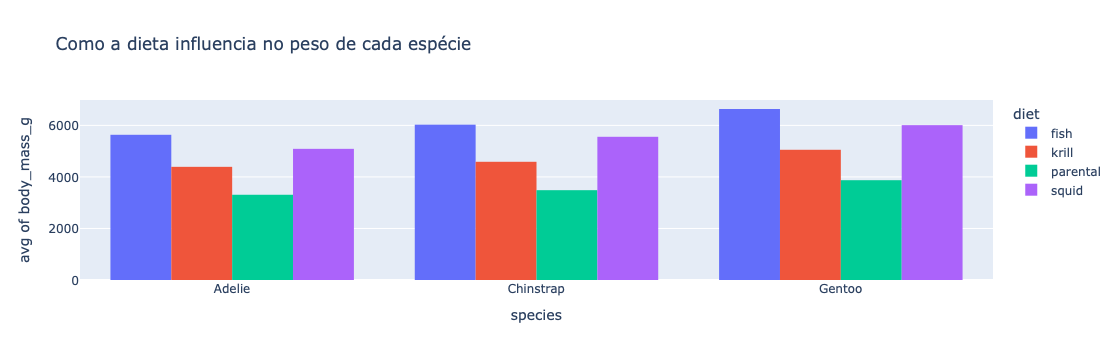

In [27]:
px.histogram(
    pinguins, 
    x="species",
    y="body_mass_g",
    color="diet",
    barmode="group",
    histfunc="avg",
    title="Como a dieta influencia no peso de cada espécie"
)

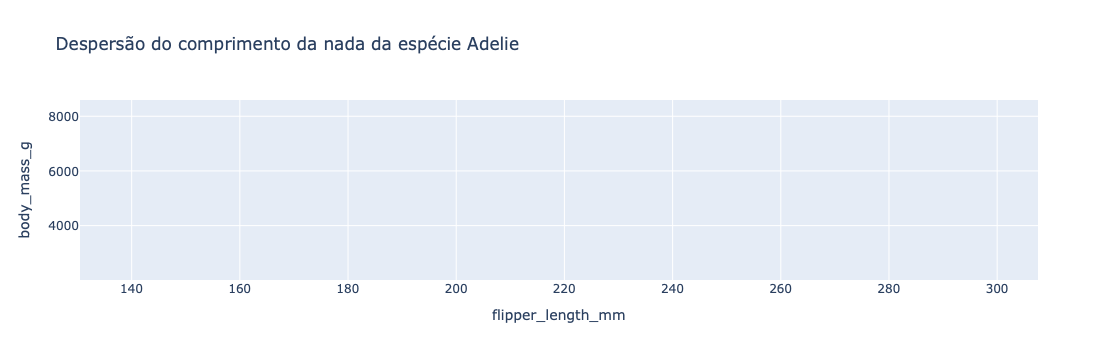

In [43]:
# optei por separar por espécie, sem juntar porque fica mais intuitivo separado
specie = "Adelie"
pinguins_species_adelie = pinguins[pinguins['species'] == specie]

px.scatter(
    pinguins_species_adelie, 
    x="flipper_length_mm",
    y="body_mass_g",
    title=f"Despersão do comprimento da nada da espécie {specie}"
)

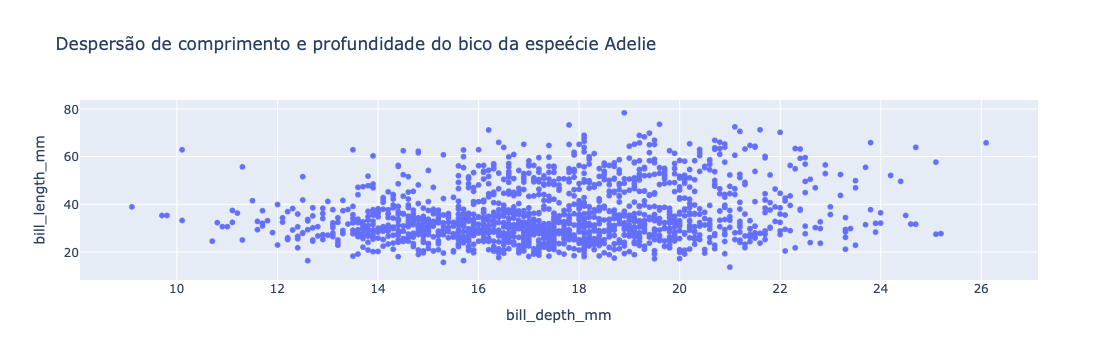

In [44]:
specie = "Adelie"
pinguins_species_adelie = pinguins[pinguins['species'] == specie]

px.scatter(
    pinguins_species_adelie, 
    x="bill_depth_mm",
    y="bill_length_mm",
    title=f"Despersão de comprimento e profundidade do bico da espeécie {specie}"
)